In [1]:
import torch as tr
import numpy as np
import matplotlib.pylab as plt
import sympy as sp


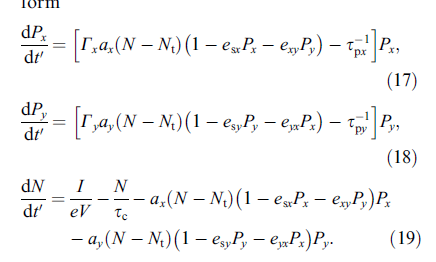

Задаем временной интервал

In [ ]:
r_x, r_y = 10**(-3)
g = 10
g_0 = 0.01
j, j_sw = 0.5
b_x, b_y = 10**(-8)



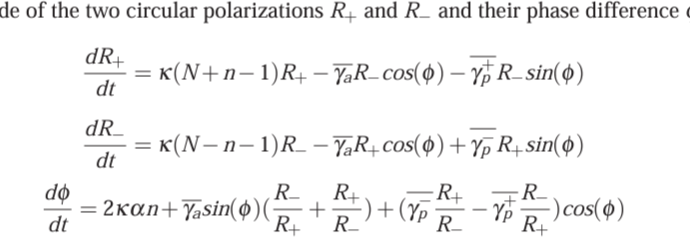

In [74]:
k = 600
a = 3
gamma_p = 35
gamma_a = -10
gamma_s = 100
theta = -0.023

In [75]:
gamma_ad_p_p = gamma_p - np.sin(2*theta) * gamma_a
gamma_ad_p_m = gamma_p + np.sin(2*theta)*gamma_a
gamma_ad_a = np.cos(2*theta) * gamma_a

Начальные условия

In [12]:
time = []
R_p_values = []
R_m_values = []

In [12]:
from scipy.integrate import odeint

In [76]:
def F(s, t):
    mu = 3.4
    dRpdt = k*(s[3]-s[4]-1)*s[0]- gamma_ad_a * s[1] * np.cos(s[2]) - gamma_ad_p_p*s[1]*np.sin(s[2])
    dRmdt = k*(s[3]-s[4]-1)*s[1]- gamma_ad_a * s[0] * np.cos(s[2]) + gamma_ad_p_m*s[0]*np.sin(s[2])
    dphidt = 2 * k * a * s[4] + gamma_ad_a * np.sin(s[2]) * (s[1]/ s[0] + s[0]/ s[1]) + np.cos(s[2]) * (gamma_ad_p_m *(s[0]/s[1]) -  gamma_ad_p_p * (s[1]/s[0]))
    dNdt = mu - s[3] - (s[3] - s[4]) * (s[0])**2 - (s[3] - s[4]) * (s[1])**2
    dndt = - gamma_s * s[4] - (s[3]+ s[4])*((s[0])**2) + (s[3] - s[4])*((s[1])**2)
    return [dRpdt, dRmdt, dphidt, dNdt, dndt]

In [9]:
t = np.linspace(0.0, 100.0, 1000000)

In [21]:
s0 = [0.05, 0.05, np.pi/2, 1, 0]

In [86]:
s0 = [3, 0, np.pi/2, 0.8, 0.2]
s = odeint(F, s0, t)

<function matplotlib.pyplot.show(close=None, block=None)>

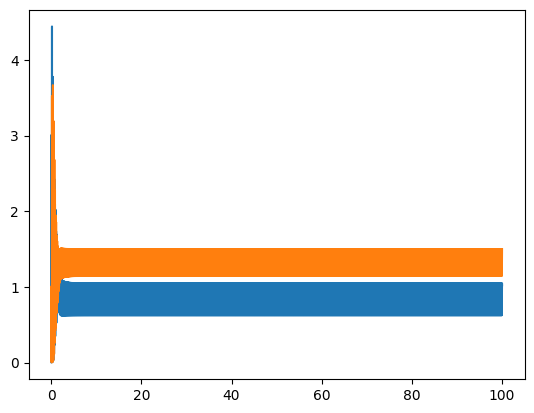

In [87]:
plt.plot(t[200,1000], s[200:1000,0], label = "+")
plt.plot(t[200,1000], s[200:1000,1], label = "-")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

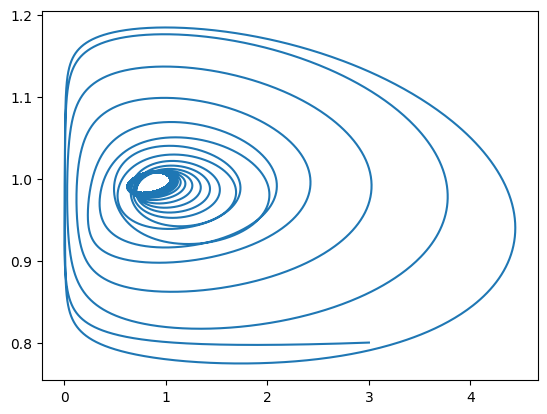

In [88]:
plt.plot(s[:,0], s[:,3], label = "-")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

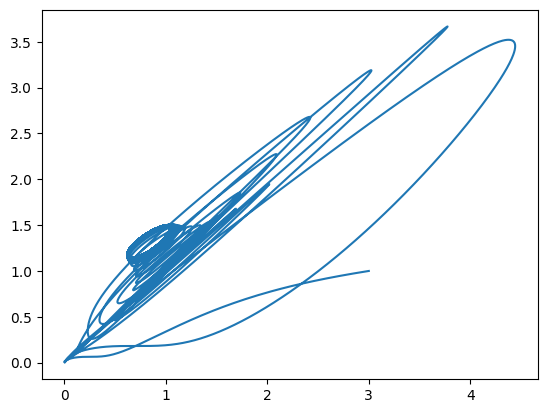

In [89]:
plt.plot(s[:,0], s[:,1], label = "-")
plt.show